# DTEK0042 Exercise 2
    Group Members:
    1. Emilia Kalliokoski
    2. Amanda Myntti
    3. Lauri Orava

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [ ]:
# Select the datafile
from google.colab import files
uploaded = files.upload()

Saving ECG_800hz.txt to ECG_800hz.txt


In [ ]:
# Load the data as a numpy array and check the first ten values

ECG_sig = np.loadtxt('ECG_800hz.txt') 
ECG_sig[0:10]

array([2350., 2423., 2375., 2538., 2409., 2397., 1714., 2444., 2387.,
       2341.])

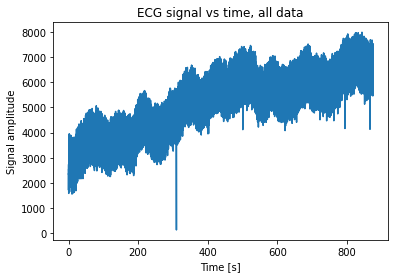

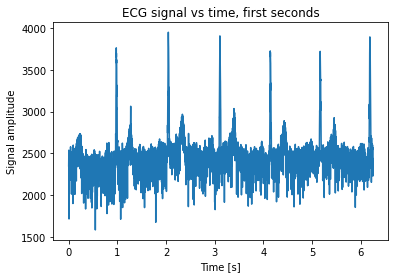

In [ ]:
# Plot the data
# The y-axis is our data
# The x-axis is time, which is 1/800 second intervals

x = np.arange(0, len(ECG_sig) * 1.0/800, 1.0/800)
plt.plot(x, ECG_sig)
plt.title("ECG signal vs time, all data")
plt.xlabel("Time [s]")
plt.ylabel("Signal amplitude")
plt.show()
plt.close()
plt.plot(x[0:5000], ECG_sig[0:5000])
plt.title("ECG signal vs time, first seconds")
plt.xlabel("Time [s]")
plt.ylabel("Signal amplitude")
plt.show()


# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

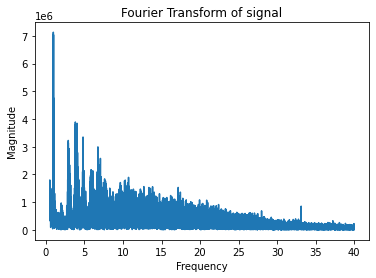

In [ ]:
# Calculate the fourier transform

def fourier(signal, a, b, freq):
  fx = sp.fft.rfftfreq(len(signal), freq)
  fy = sp.fft.rfft(signal)

  # drop the unwanted values
  fx_new = []
  fy_new = []
  for x in range(len(fx)):
    if fx[x] < a or fx[x] > b:
      continue
    fx_new.append(fx[x])
    fy_new.append(fy[x])

  return fx_new, fy_new

# calculate the transformation
fx_new, fy_new = fourier(ECG_sig, 0.5, 40, 1/800.0)

# plot the new values, y-axis as absolute value
plt.plot(fx_new, np.abs(fy_new))
plt.title("Fourier Transform of signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

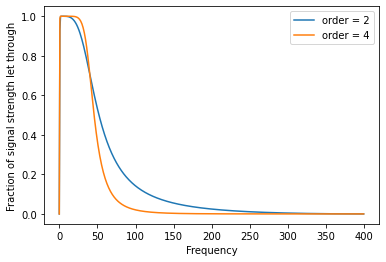

In [ ]:
from scipy.signal import freqz, butter, lfilter

# butter band pass impelemtation
def butter_bandpass(lowcut, highcut, freq, order):
  """
  Calculates the Butterworth band pass numerator (b) and denominator (a)
  """
  sampling_rate = 0.5*freq
  b,a = butter(order, [lowcut/sampling_rate, highcut/sampling_rate], btype = 'band')
  return b,a


# parameters
fs = 800
lowcut = 0.5
highcut = 40
order = [2,4]

# plot the frequency graphs for orders 2 and 4
for i in order:
  b,a = butter_bandpass(lowcut, highcut, fs, i)
  w,h = freqz(b,a)
  plt.plot((fs*0.5/np.pi)*w, abs(h), label = "order = %d" % i)
plt.legend(loc='best')
plt.xlabel("Frequency")
plt.ylabel("Fraction of signal strength let through")
plt.show()





## Observations:

The Butterworth band pass muffles out frequencies above high cutoff value. The frequencies below low cutoff value are dropped. The order of the filter affects the slope, bigger order means steeper slope, which means that the frequencies are muffled in a small interval.

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

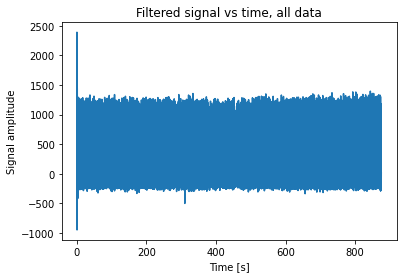

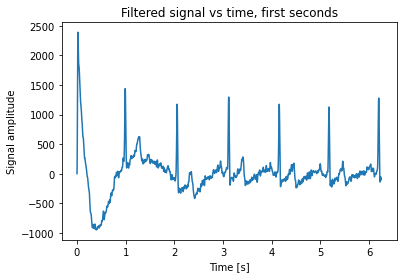

In [ ]:
# code for band pass that returns the filtered values
def butter_bandpass_filter(lowcut, highcut, freq, order, data):
  sampling_rate = 0.5*freq
  b,a = butter(order, [lowcut/sampling_rate, highcut/sampling_rate], btype = 'band')
  y = lfilter(b,a,data)
  return y

# filter the signal
filtered = butter_bandpass_filter(lowcut, highcut, fs, order=4, data=ECG_sig)

# plot all data and first 6.25 seconds
x = np.arange(0,len(filtered)*1/800, 1/800)
plt.plot(x, filtered)
plt.xlabel("Time [s]")
plt.ylabel("Signal amplitude")
plt.title("Filtered signal vs time, all data")
plt.show()
plt.close()
plt.plot(x[0:5000],filtered[0:5000]) #first 6.25 seconds
plt.xlabel("Time [s]")
plt.ylabel("Signal amplitude")
plt.title("Filtered signal vs time, first seconds")
plt.show()

## Observations:
With the band pass, we receive a nice and clean ECG signal. We have removed high and low level noise. It seems that there is about 1 beat every second, so 60 per minute. The first values in 0s-1s look a lot different than rest of the data. They are probably caused by the sensor turning on.

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

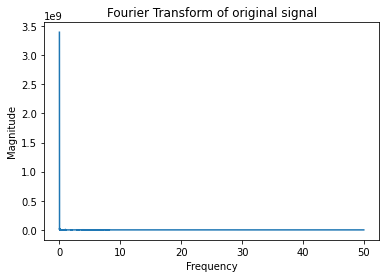

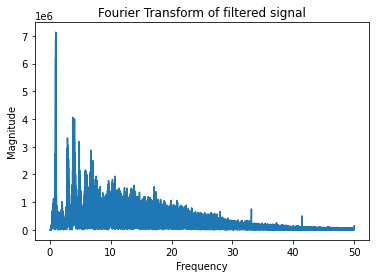

In [ ]:


# fourier for old and filtered signal
old_sig_freq, old_sig_values = fourier(ECG_sig, 0, 50, 1/800.00 )
filtered_sig_freq, filtered_sig_values = fourier(filtered, 0,50, 1/800.0)


# plot the new values, y-axis as absolute value
plt.plot(old_sig_freq, np.abs(old_sig_values))
plt.title("Fourier Transform of original signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()
plt.close()
plt.plot(filtered_sig_freq, np.abs(filtered_sig_values))
plt.title("Fourier Transform of filtered signal")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()
plt.close()



## Observations:

From the Fourier plots, we see that the original signal contained huge amounts of low level frequencies, and filtering has removed those that are less than 0.5Hz. In the filtered signal Fourier plot we notice that the amplitude of the frequencies is really small after 40Hz, which is due to 40Hz being the cutoff value in the band pass.

Here we have plotted the first 6.25 seconds of each signal. Picture 1  is before filtering, picture 2 is after. It is clear to see that that the filtered image is better in many ways:
- less noisy
- the signal is centered around 0
The filtered image still contains the peaks and lows of the original signal.


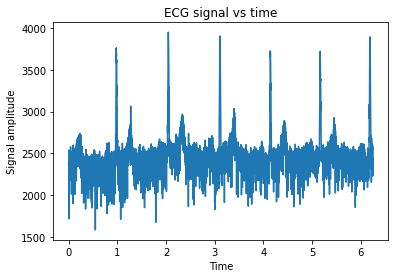


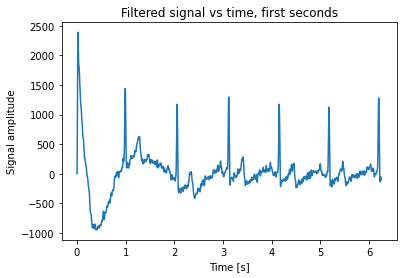

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


In [ ]:
#still need to locally install biosppy
#code
!pip --quiet install biosppy
import biosppy 
from biosppy.signals import ecg 

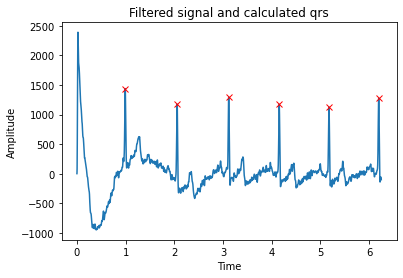

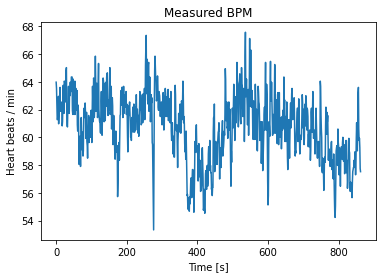

In [ ]:
peaks = ecg.hamilton_segmenter(signal=filtered, sampling_rate=800.0)

# we focus again on first 6.25 seconds, which is why we limit again with 5000

# peaks' indexes
new_peaks = [value for value in peaks[0] if value < 5000]
# PBM calculation
heart_rate = [peaks[0][i+1]- peaks[0][i] for i in range(len(peaks[0])-1)]
#print(heart_rate[0:10])


# plotting
plt.plot(x[0:5000],filtered[0:5000]) #first 6.25 seconds
plt.plot(x[new_peaks], filtered[new_peaks], 'rx')
plt.title("Filtered signal and calculated qrs")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()
plt.close()


# heart rate plotting
plt.plot(np.array(heart_rate)/800.0*60)
plt.xlabel("Time [s]")
plt.ylabel("Heart beats / min")
plt.title("Measured BPM")
plt.show()


## Observations:

The Hamilton segmenter works fine, it does recognize all heart beats but not the first signal which is likely caused by starting up the device. The heart rate of the measured person seems to be around 58-66/min which is close to what we previously suspected. This is resting pulse for a regular person. 